In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv('/Users/harshitgupta/Desktop/vs /VS-Data-Den/model_training/regional_master_50000009.csv',index_col='YEARWEEK',parse_dates=True)
# df.index.freq='MS'

In [6]:
df.head()

,TOTAL_SALES
YEARWEEK,
2018-01-01,1721999
2018-01-08,902891
2018-01-15,1046163
2018-01-22,876159
2018-01-29,1161595


<Axes: xlabel='YEARWEEK'>

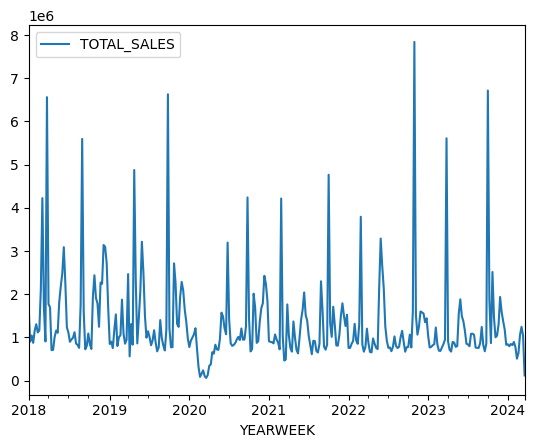

In [7]:
df.plot()

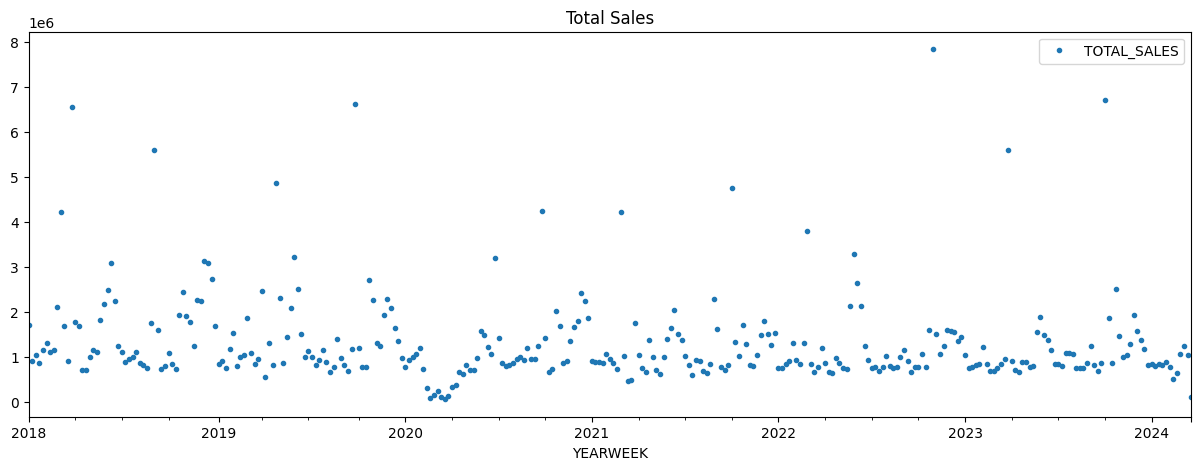

In [8]:

color_pal = sns.color_palette()
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Total Sales')
plt.show()

In [9]:
df['YEAR'] = df.index.year
df['MONTH'] = df.index.month
df['DAY'] = df.index.day
df['DAY_OF_WEEK'] = df.index.dayofweek
df['WEEK_OF_YEAR'] = df.index.isocalendar().week


In [10]:
train = df.iloc[:int(0.6*len(df))]
test = df.iloc[int(0.6*len(df)):]


In [11]:
features = ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'WEEK_OF_YEAR']
target = 'TOTAL_SALES'


In [12]:
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

In [13]:
X_train.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,WEEK_OF_YEAR
YEARWEEK,,,,,
2018-01-01,2018,1,1,0,1
2018-01-08,2018,1,8,0,2
2018-01-15,2018,1,15,0,3
2018-01-22,2018,1,22,0,4
2018-01-29,2018,1,29,0,5


In [14]:
y_test.tail()

YEARWEEK
2024-02-19     640202
2024-02-26    1060437
2024-03-04    1247705
2024-03-11    1042492
2024-03-18     120695
Name: TOTAL_SALES, dtype: int64

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

In [83]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [84]:
alpha = 1  # Regularization strength, adjust as needed
poly_reg = Ridge(alpha=alpha)
poly_reg.fit(X_train_poly, y_train)

Ridge(alpha=1)

In [85]:
y_pred_train_poly = poly_reg.predict(X_train_poly)
y_pred_test_poly = poly_reg.predict(X_test_poly)

In [86]:
y_pred_train_poly = poly_reg.predict(X_train_poly)
y_pred_test_poly = poly_reg.predict(X_test_poly)

In [87]:
train_rmse_poly = np.sqrt(mean_squared_error(y_train, y_pred_train_poly))
test_rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_test_poly))


In [88]:
train_rmse_poly , test_rmse_poly

(836706.9339950375, 1184282.58836844)

In [89]:
# model = xgb.XGBRegressor(X_train, y_train, X_test, y_test)

In [90]:
# results = model.fit()

In [91]:
# test['prediction'] = xg_reg.predict(X_test)

# df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

# df.tail(2)

In [92]:

# ax = df[['TOTAL_SALES']].plot(figsize=(15, 5))

# df['prediction'].plot(ax=ax, style='.')
# plt.legend(['Ground Truth Data', 'Predictions'])
# ax.set_title('Actual Past Data and Prediction')
# plt.show()

In [93]:
predictions_poly = pd.DataFrame({'Date': test.index, 'Actual_Sales': y_test, 'Predicted_Sales': y_pred_test_poly})

# Extracting year and week of the year from the index
predictions_poly['Year_Week'] = predictions_poly['Date'].dt.strftime('%Y-%U')

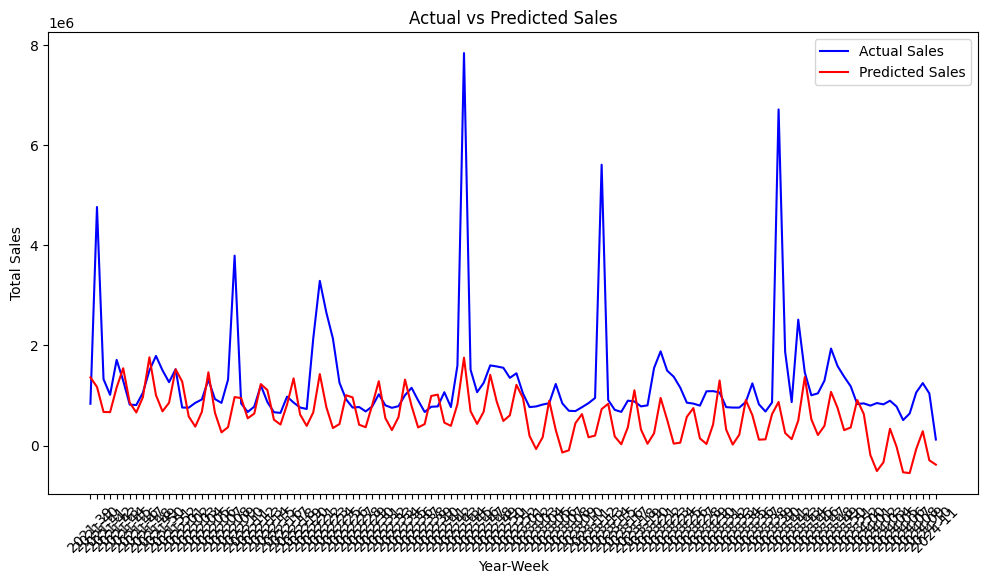

In [94]:
plt.figure(figsize=(12, 6))
plt.plot(predictions_poly['Year_Week'], predictions_poly['Actual_Sales'], label='Actual Sales', color='blue')
plt.plot(predictions_poly['Year_Week'], predictions_poly['Predicted_Sales'], label='Predicted Sales', color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Year-Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [95]:
combined_data = pd.concat([train, test])


In [96]:
# plt.figure(figsize=(12, 6))
# plt.plot(combined_data.index, combined_data['TOTAL_SALES'], label='Actual Past Data', color='blue')
# plt.plot(test.index, y_pred_test, label='Predictions', color='red')
# plt.title('Actual Past Data vs. Predictions')
# plt.xlabel('Date')
# plt.ylabel('Total Sales')
# plt.legend()
# plt.show()

In [97]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

NameError: name 'y_pred_test' is not defined

In [ ]:
rmse

1077730.0951269052